<a href="https://colab.research.google.com/github/albatellouc3m/P1_AA/blob/main/P1_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importar datos**

Primeramente tenemos que leer los datos en local (archivos de google colab) En nuestro caso, hemos elegido el NIA 100495755, donde los dos últimos dígitos son 5 y 5. Por lo que nuestro dataset seria el número 10 (5 + 5 = 10).

In [2]:
import pandas as pd

datos_generales = pd.read_csv('./attrition_availabledata_10.csv.gz')
datos_test = pd.read_csv('./attrition_competition_10.csv.gz') # Datos para realizar el test

datos_generales.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.462297,13,3,3,3.0,3.0,3.0,48,Travel_Rarely,Research & Development,...,Y,13,8,1,18.0,2,8,7,7,No
1,7.488597,6,1,3,3.0,4.0,4.0,31,Travel_Frequently,Research & Development,...,Y,17,8,1,3.0,2,1,0,0,Yes
2,7.116541,16,2,4,1.0,1.0,3.0,36,Travel_Rarely,Research & Development,...,Y,24,8,0,6.0,6,5,0,3,No
3,9.709125,6,3,4,3.0,3.0,3.0,49,Travel_Rarely,Research & Development,...,Y,22,8,0,25.0,2,7,0,7,No
4,6.297729,6,4,3,3.0,2.0,3.0,40,Travel_Frequently,Research & Development,...,Y,13,8,1,8.0,3,8,3,7,No


# **2. EDA** **Simplificado**




Antes de realizar el preprocesado de datos, debemos analizar el set de datos para sacar información importante para el ejercicio. Los pasos de este análisis son los siguientes:

## 2.1 ¿Cuantas variables e instancias hay?

  El set de availabledata contiene un total de 2940 instancias y 31 variables. Para calcularlo hemos utilizado el comando *shape*.  


In [3]:
from IPython.display import display

display(datos_generales.shape)

(2940, 31)

## 2.2 Tipos de variables

 En el conjunto de datos propuesto para el ejercicio se pueden identificar varios tipos de variable. Para mostrarlos usamos el comando *dtype*, el cual te muestra cada variable con su tipo.



In [4]:
from IPython.display import display

display(datos_generales.dtypes)

hrs                        float64
absences                     int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromot

## 2.3 Variables categóricas con alta cardinalidad

  Debemos estudiar si hay variables categóricas con alta cardinalidad, es decir, variables que toman un gran número de valores distintos, ya que estas variables pueden causar problemas y hacer que el modelo sea más complejo.

  El código para identificarlas es el siguiente:

In [5]:
for col in datos_generales.select_dtypes(include=['object']).columns:
    print(f'{col}: {datos_generales[col].nunique()} valores únicos')

BusinessTravel: 3 valores únicos
Department: 3 valores únicos
EducationField: 6 valores únicos
Gender: 2 valores únicos
JobRole: 9 valores únicos
MaritalStatus: 3 valores únicos
Over18: 1 valores únicos
Attrition: 2 valores únicos


## 2.4 ¿Que variables tienen valores faltantes y cuantos?

  Para saber que variables tienen valores faltantes, es decir que en alguna de las instancias no tenga valor asignado, utilizamos el comando *isnull*.

In [6]:
datos_generales.isnull().sum() # Añadimos el sum para que nos muestre una cuenta total de valores nulos y no uno por uno

hrs                         0
absences                    0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    15
JobSatisfaction            12
WorkLifeBalance            29
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         17
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           5
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

## 2.5 Columnas constantes o de id

  Columnas constantes son aquellas que tienen el mismo valor para todas las instancias del conjunto de datos.

  Por otro lado, columnas de id son aquellas que contienen identificadores únicos para cada instancia.

  En nuestro conjunto de datos, la primera columna es de ID y podemos usar el comando nunique. Ya que en la pregunta 3 lo necesitabamos, vimos en el resultado que la variable Over18 es constante, y por lo tanto, no aporta información útil en el desarrollo del ejercicio.
  

## 2.6 Regresion o clasificación:

  Se trata de un problema de clasificación, ya que la columna de clases no contiene valores reales. Además vemos que está completamente desbalanceado ya que tenemos 474 valores de attrition 'No' y 2466 de 'Yes'. El código para esta resolución es el siguiente:

In [7]:
# Creamos contadores para cada valor
contador_yes = 0
contador_no = 0

# Recorremos todas las instancias de Attrition y vemos cuantos de cada valor hay
for valor in datos_generales['Attrition']:
    if valor == 'Yes':
        contador_yes += 1
    elif valor == 'No':
        contador_no += 1

print(f'Yes: {contador_yes}')
print(f'No: {contador_no}')


Yes: 474
No: 2466


# **3. Decidir cómo se va a realizar la Evaluación**

El objetivo de esta sección es definir correctamente la estrategia de evaluación del modelo, asegurando que los resultados sean fiables y reproducibles. Se propone un enfoque de doble nivel de evaluación:


1.   Evaluación Outer (Holdout): Para estimar el rendimiento futuro real del modelo.
2.   Evaluación Inner (Cross Validation): Para comparar modelos y realizar optimización de hiperparámetros (HPO) dentro de la partición de entrenamiento (train).



## 3.1 Visión general del proceso
El siguiente esquema muestra el flujo de evaluación:



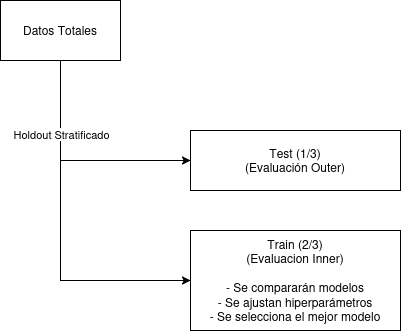



1.   Partición en Holdout

*   Se divide el conjunto de datos en 2/3 para train y 1/3 para test, manteniendo la proporción de la variable objetivo (stratify).
*   El conjunto train se usará durante la mayor parte de la práctica (para comparar modelos, probar hiperparámetros, etc.).
*   El conjunto test se usará solo al final, para obtener la estimación real de rendimiento del modelo final (outer).

2.   Evaluación interna (inner)

*   Dentro de train se aplica K-Fold Cross Validation (por ejemplo, 5 folds estratificados).
*   Se utilizan las medias de las métricas obtenidas en CV para comparar diferentes modelos y ajustes de hiperparámetros (HPO).
*   Al concluir, se elige la combinación que ofrezca mejor rendimiento según la métrica principal.

3.   Evaluación externa (outer)

*   Una vez decidido el modelo y ajustados los hiperparámetros, se reentrena con todo train.
*   Finalmente, se evalúa sobre test para obtener la estimación de rendimiento futuro.



## 3.2 Partición Holdout y primeros pasos

La división de los datos en Holdout se hará así: dos tercios (2/3) se usarán para train y un tercio (1/3) para test. Es clave mantener la proporción original de la variable objetivo (Attrition), ya que hay un desbalance entre los empleados que renuncian y los que no. Para lograrlo, se aplicará un método de estratificación en la partición.

Este código muestra cómo se realiza la partición estratificada en 2/3 para entrenamiento y 1/3 para test:

La salida es:


*   Train: ~16.1% de renunciantes (1) y ~83.9% de no renunciantes (0)
*   Test: ~16.1% de renunciantes (1) y ~83.9% de no renunciantes (0)




## 3.3 Métricas de Evaluación

La métrica principal para evaluar el modelo será la Balanced Accuracy, útil en problemas de clasificación desbalanceada. Se obtiene como el promedio del True Positive Rate (TPR) y el True Negative Rate (TNR).


### 3.3.1 Definiciones de métricas de Evaluación

El True Positive Rate (TPR), indica la proporción de empleados que renunciaron y fueron clasificados correctamente. Se calcula como:

$TPR = \frac{TP}{TP + FN}$

donde:


*   TP: son los empleados que realmente renunciaron y el modelo los predijo correctamente.
*   FN: son los empleados que renunciaron pero que el modelo los predijo incorrectamente, como que se quedaron.



El True Negative Rate (TNR) mide la proporción de empleados que no renunciaron y fueron clasificados correctamente:

$TPR = \frac{TN}{TN + FP}$

donde:

* TN: empleados que no renunciaron y fueron clasificados correctamente.
* FP: empleados que no renunciaron pero fueron clasificados como renunciantes.






La Balanced Accuracy se obtiene con la siguiente fórmula:

$BalancedAccuracy = \frac{TPR+TNR}{2}$

Esta métrica es más fiable que la Accuracy estándar en datos desbalanceados, ya que evita sesgos hacia la clase mayoritaria.

Otras métricas que se calcularán incluyen:

*   Accuracy, que mide la proporción total de predicciones correctas.
*   Matriz de confusión, que detalla los aciertos y errores del modelo en ambas clases.




## 3.4 Evaluación inner
La evaluación interna (inner) se aplicará dentro del conjunto de entrenamiento (X_train, y_train) para comparar modelos y ajustar hiperparámetros. Sirve para:

*   Comparar modelos como KNN o Árboles de Decisión.
*   Ajustar hiperparámetros con GridSearchCV o RandomizedSearchCV.



### 3.4.1 K-Fold Stratificado

Se emplea K-Fold Cross Validation con estratificación (p.ej., k=5). En cada iteración, 4 folds se usan para entrenar y 1 fold para validar, repitiendo el proceso con todos los folds. El promedio de resultados en las iteraciones da una estimación robusta del rendimiento.

Un diagrama se vería asi
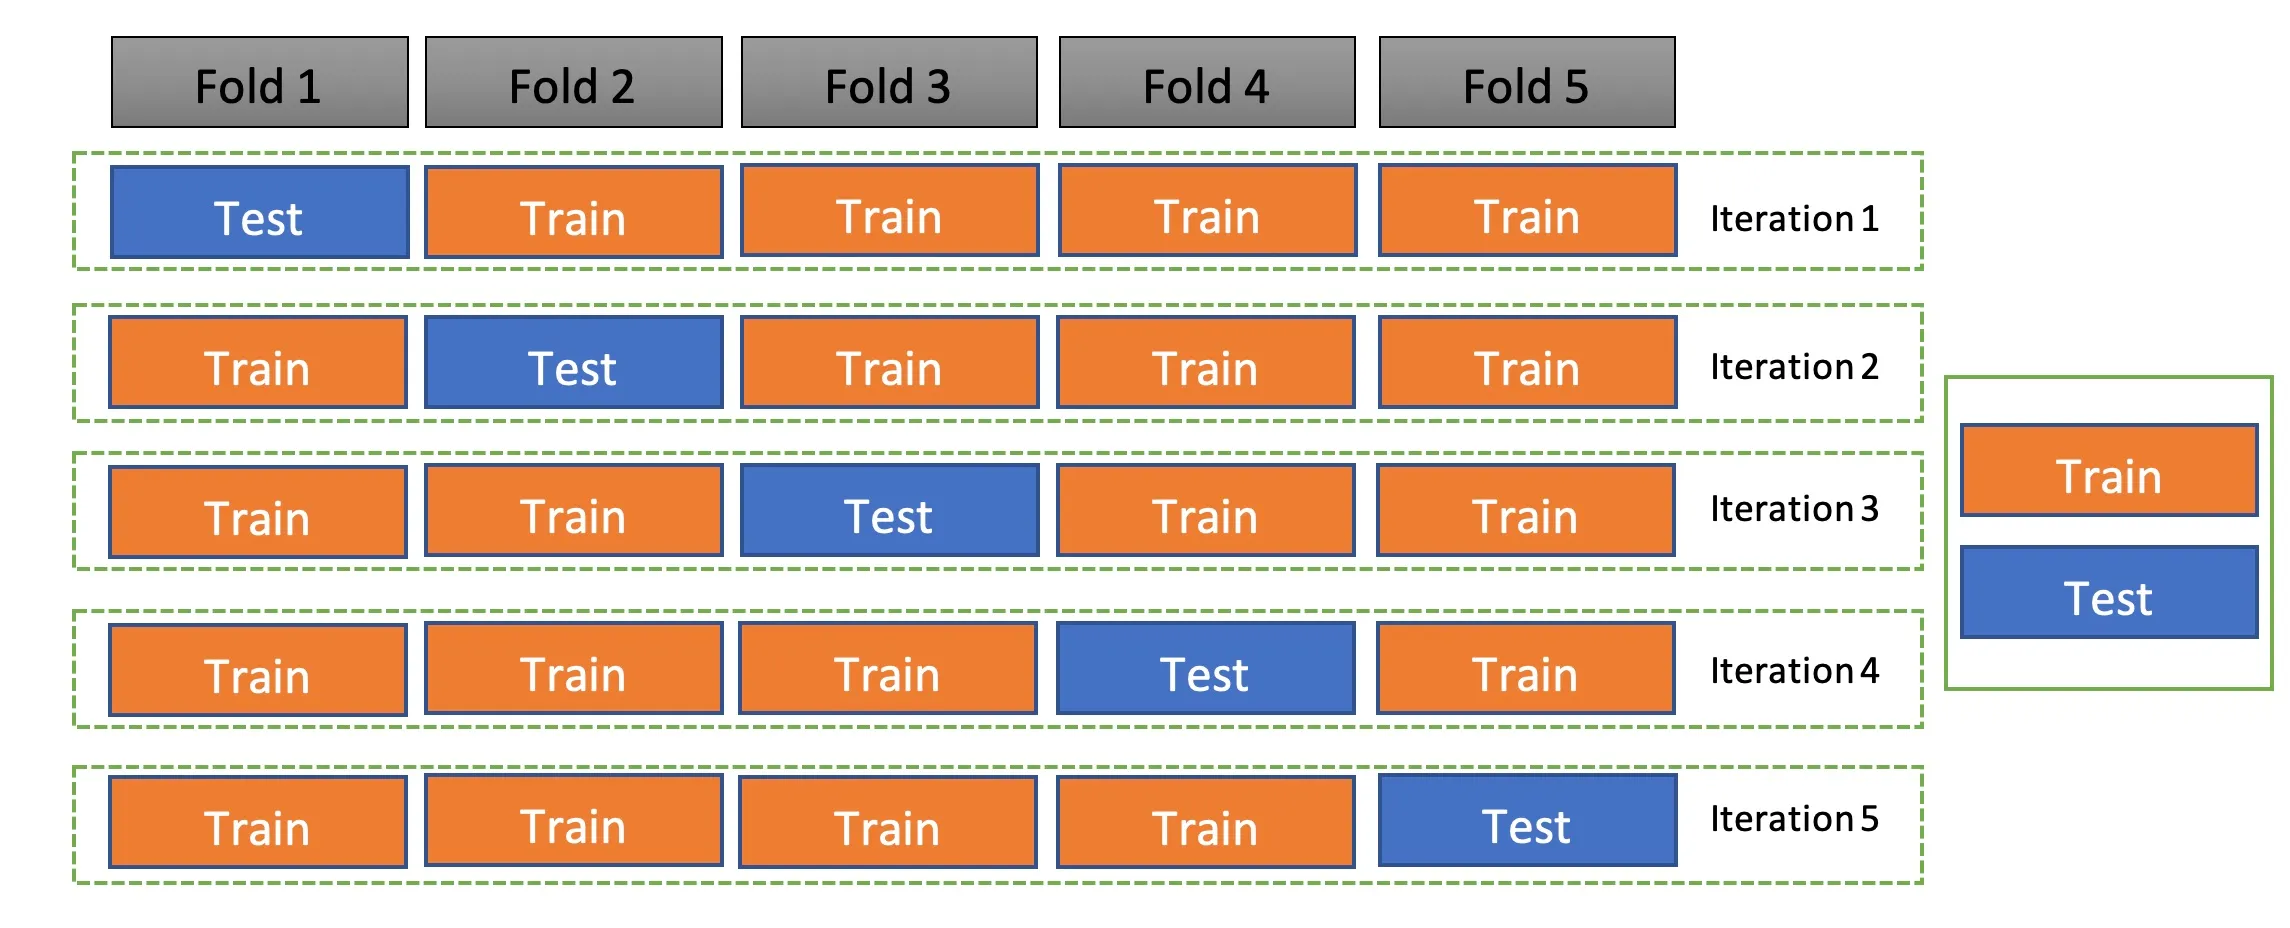

## 3.5 Evaluación Final (Outer)
Una vez elegido el modelo y ajustados los hiperparámetros:
   *   Entrenamos ese modelo con todo X_train, y_train (en lugar de entrenarlo solo con los folds).
   *   Evaluamos con X_test, y_test para obtener las métricas finales (Balanced Accuracy, TPR, TNR, Accuracy, matriz de confusión). Este es el resultado final que se reporta como rendimiento futuro esperado.

# **4.Métodos básicos: KNN y TREES**



Esta sección explora modelos de tipo K-Nearest Neighbors (KNN) y árboles de decisión como aproximaciones básicas al problema de clasificación. Primero se decide cómo abordar la imputación y el escalado de las variables, factores que pueden incidir de forma notable en el rendimiento de KNN. Después se entrena el modelo con parámetros por omisión y se mide el tiempo de entrenamiento y la métrica principal (Balanced Accuracy). Seguidamente se ajustan algunos hiperparámetros importantes y se comprueba si la mejora obtenida justifica el incremento en el coste computacional. Finalmente se comentan las conclusiones comparando también con el modelo dummy previo.

## 4.1 Métodos de escalado e imputación en KNN

En esta sección nos encargamos de encontrar la mejor combinación de escalado e imputación para KNN, para ello primero debemos diferenciar los distintos tipos de variables de nuestro conjunto de datos (ordinales, categóricas y numéricas):

In [8]:
# PRIMERO DIVIDIMOS EN X y Y eliminando las columnas innecesarias

#Convertimos la variable objetivo a numérica
datos_generales['Attrition'] = datos_generales['Attrition'].map({'Yes': 1, 'No': 0})

X = datos_generales.drop(columns=['Attrition', 'EmployeeID', 'Over18', 'EmployeeCount', 'StandardHours'])
y = datos_generales['Attrition']

# Definimos los tipos de variables
categorical_features = ['Department', 'JobRole', 'EducationField']
ordinal_features = ['BusinessTravel', 'Gender', 'MaritalStatus']
numerical_features = X.select_dtypes(include=['int64','float64']).columns.tolist()

valores_ordinales = [
    ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],
    ['Male', 'Female'],
    ['Single', 'Married', 'Divorced']
]


Como nuestro conjunto de datos contiene valores no numéricos, necesitamos algún mecanismo para poder transformarlos y así realizar la media y la mediana sin problema. Para ello, hacemos uso del ColumnTransformer y de encoders:

- OneHotEncoder: Convierte cada atributo en un valor binario (se usa cuando no hay orden lógico),
- OrdinalEncoder: Asigna un número entero a cada categoría, siguiendo un orden.

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# REALIZAMOS EL HOLDOUT PARA EL POSTERIOR ENTRENAMIENTO DEL PREPROCESADO
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=1/3,
    random_state=10,
    stratify=y
)

#Aplicamos el ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),  # OneHotEncoder para las variables categóricas
        ('ord', OrdinalEncoder(categories=valores_ordinales), ordinal_features) # OrdinalEncoder para las variables ordinales
    ],
    remainder='passthrough' # El resto de columnas se mantienen igual
)

X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns = preprocessor.get_feature_names_out()) # Aplicamos el preprocesado a X_train


Como en este momento ya hemos aplicado el preprocesado y todas las variables son numéricas, ya podemos evaluar cada método de escalado e imputación sin problema. Para ello definimos un diccionario para scalers, otro para imputers y realizamos un pipeline para cada combiniación. Finalmente imprimimos por pantalla todos los resultados y escogemos la mejor opción (máximo):


In [10]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Evaluación interna con 3-fold CV
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=495774)

# Diccionario de resultados
inner_scores = {}

# MÉTODOS DE ESCALADO
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# MÉTODOS DE IMPUTACIÓN
imputers = {
    "mean": SimpleImputer(strategy="mean"),
    "median": SimpleImputer(strategy="median")
}

# Probamos todas las combinaciones de imputación + escalado con KNN posibles
for imputer_name, imputer in imputers.items():
    for scaler_name, scaler in scalers.items():
        
        # Crear pipeline con imputación, escalado y modelo KNN
        pipeline = Pipeline([
            ('imputer', imputer),  
            ('scaler', scaler),  
            ('knn', KNeighborsClassifier())  
        ])
        
        # Evaluamos con validación cruzada
        scores = cross_val_score(pipeline, X_train, y_train, cv=inner, scoring='balanced_accuracy')  # Balance Accuracy como métrica
        mean_score = np.mean(scores)  # Media de balanced accuracy
        
        # Guardamos resultado
        inner_scores[f'KNN with {imputer_name} & {scaler_name}'] = mean_score


for name, score in inner_scores.items():
    print(f"{name}: {score}")

# Mejor combinación
best_option = max(inner_scores.items(), key=lambda x: x[1])
print(f"\nMejor combinación: {best_option[0]} con score de {best_option[1]}")

KNN with mean & StandardScaler: 0.5649193997940728
KNN with mean & MinMaxScaler: 0.5586667628535141
KNN with mean & RobustScaler: 0.5757790041600811
KNN with median & StandardScaler: 0.5668108376344158
KNN with median & MinMaxScaler: 0.5599499281877742
KNN with median & RobustScaler: 0.5757790041600811

Mejor combinación: KNN with mean & RobustScaler con score de 0.5757790041600811


## 4.2 Evaluación de KNN y Árboles de Decisión

### 4.2.1 Modelos con Hiperparámetros por Omisión y Tiempo de Entrenamiento

*KNN con parámetros por omisión*

In [11]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Copiamos el pipeline base y cambiamos el clasificador, además de utilizar el scaler y el imputador que nos ha dado mejor resultado
default_knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores perdidos
    ('scaler', RobustScaler()),  # Estandarizar
    ('knn', KNeighborsClassifier())  # sin especificar nada: hiperparámetros por omisión
])

# Medimos tiempo de entrenamiento
start_time = time.time()
# Evaluar con validación cruzada
scores_knn = cross_val_score(default_knn_pipeline, X_train, y_train, cv=inner, scoring='balanced_accuracy')  # Accuracy como métrica
mean_score_knn = np.mean(scores_knn)  # Media de accuracy
end_time = time.time()

training_time_knn_default = end_time - start_time
print(f"Tiempo de entrenamiento KNN (default): {training_time_knn_default} segundos")

print(f"Balanced Accuracy KNN (default): {mean_score_knn}")


Tiempo de entrenamiento KNN (default): 0.056940555572509766 segundos
Balanced Accuracy KNN (default): 0.5757790041600811


*Árbol de decisión con parámetros por omisión*

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un pipeline similar, esta vez con un árbol de decisión
default_tree_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores perdidos
    ('scaler', RobustScaler()),  # Estandarizar
    ('tree', DecisionTreeClassifier(random_state=495774))  # sin especificar nada: hiperparámetros por omisión
])

# Medimos tiempo de entrenamiento
start_time = time.time()
scores_tree = cross_val_score(default_tree_pipeline, X_train, y_train, cv=inner, scoring='balanced_accuracy')  # Accuracy como métrica
mean_score_tree = np.mean(scores_tree)  # Media de accuracy
end_time = time.time()

training_time_tree_default = end_time - start_time
print(f"Tiempo de entrenamiento Árbol (default): {training_time_tree_default} segundos")

print(f"Balanced Accuracy Árbol (default): {mean_score_tree}")




Tiempo de entrenamiento Árbol (default): 0.06351542472839355 segundos
Balanced Accuracy Árbol (default): 0.7620253233736225


En este primer paso comparamos:
    * Tiempo de entrenamiento de KNN y Árbol de decisión con sus parámetros por omisión
    * Balanced Accuracy, TPR y TNR

### 4.2.2 Ajuste de Hiperparámetros y Medición de Tiempos
Aquí realizaremos un GridSearchCV. Se miden los tiempos de entrenamiento con la búsqueda con el train set.


*Búsqueda de Hiperparámetros importantes en KNN*
Los hiperparámetros principales de KNN suelen ser:

* n_neighbors: número de vecinos,
* weights: uniforme o ponderado por la distancia,

In [13]:
from sklearn.model_selection import GridSearchCV

# Definimos los hiperparámetros
param_grid_knn = {
    # Ejemplo para la imputación numérica si lo estás evaluando también

    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']  # si quieres probar otras distancias
}

# Creación del pipeline base (mismo que default, pero sin hiperparámetros fijos)
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', RobustScaler()),  
    ('knn', KNeighborsClassifier())  
])

knn_grid = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn,
    scoring='balanced_accuracy',
    cv=inner,
    n_jobs=-1
)

start_time = time.time()
knn_grid.fit(X_train, y_train)
end_time = time.time()

knn_best_model = knn_grid.best_estimator_
knn_best_params = knn_grid.best_params_
knn_best_score = knn_grid.best_score_
training_time_knn_hpo = end_time - start_time


print(f"\nMejores hiperparámetros para KNN: {knn_best_params}")
print(f"Tiempo de entrenamiento KNN (HPO): {training_time_knn_hpo} segundos")
print(f"Balanced Accuracy KNN (HPO): {knn_best_score}")




Mejores hiperparámetros para KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Tiempo de entrenamiento KNN (HPO): 1.9349863529205322 segundos
Balanced Accuracy KNN (HPO): 0.7968899950376332


*Búsqueda de hiperparámetros importantes en Árbol de decisión*
Los hiperparámetros más comunes en un DecisionTreeClassifier son::

    * max_depth (profundidad máxima),
    * min_samples_split,
    * min_samples_leaf.

In [14]:
param_grid_tree = {
    'tree__max_depth': [3, 5, 7, 10, 15],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 5]
}

tree_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', RobustScaler()),  
    ('tree', DecisionTreeClassifier(random_state=495774)) 
])

tree_grid = GridSearchCV(
    estimator=tree_pipeline,
    param_grid=param_grid_tree,
    scoring='balanced_accuracy',
    cv=inner,
    n_jobs=-1
)

start_time = time.time()
tree_grid.fit(X_train, y_train)
end_time = time.time()

tree_best_model = tree_grid.best_estimator_
tree_best_params = tree_grid.best_params_
tree_best_score = tree_grid.best_score_
training_time_tree_hpo = end_time - start_time


print(f"\nMejores hiperparámetros para Árbol: {tree_best_params}")
print(f"Tiempo de entrenamiento Árbol (HPO): {training_time_tree_hpo} segundos")
print(f"Balanced Accuracy Árbol (HPO): {tree_best_score}")



Mejores hiperparámetros para Árbol: {'tree__max_depth': 15, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Tiempo de entrenamiento Árbol (HPO): 0.4689180850982666 segundos
Balanced Accuracy Árbol (HPO): 0.7619736775948042


### 4.2.3 Efecto de los valores de los hiperparámetros
En esta sección analizaremos el efecto de los hiperparámetros en el rendimiento de los modelos de KNN y Árboles de Decisión. Utilizaremos los resultados obtenidos de GridSearchCV y graficaremos la Balanced Accuracy en función de los valores de cada hiperparámtero

#### 4.2.3.1 Análisis del Efecto de los Hiperparámetros en KNN
A continuación, representaremos gráficamente como varía la Balanced Accuracy en función de n_neighbors para cada combinación de weights y metric.

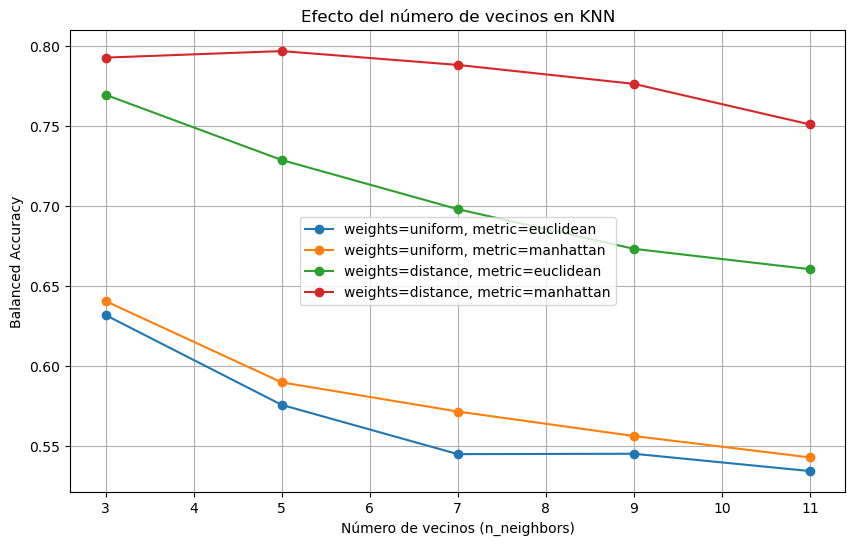

In [15]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Extraemos los resultados de la validación cruzada en DataFrames.
results_knn = pd.DataFrame(knn_grid.cv_results_)

# Configuramos la figura para el plot
plt.figure(figsize=(10, 6))

# Iteramos sobre cada combinación de 'weights' y 'metric'
for weight in results_knn['param_knn__weights'].unique():
    for metric in results_knn['param_knn__metric'].unique():
        # Filtramos el DataFrame para cada combinación de 'weights' y 'metric'
        subset = results_knn[
            (results_knn['param_knn__weights'] == weight) &
            (results_knn['param_knn__metric'] == metric)
        ]
        # Ordenamos los datos según n_neighbors
        subset = subset.sort_values('param_knn__n_neighbors')
        plt.plot(
            subset['param_knn__n_neighbors'], 
            subset['mean_test_score'], 
            marker='o', 
            label=f'weights={weight}, metric={metric}'
        )

# Configuramos etiquetas y título
plt.xlabel("Número de vecinos (n_neighbors)")
plt.ylabel("Balanced Accuracy")
plt.title("Efecto del número de vecinos en KNN")
plt.legend()
plt.grid(True)
plt.show()


La gráfica muestra cómo el número de vecinos en KNN influye en la Balanced Accuracy según diferentes combinaciones de weights y metric. Observamos que un menor número de vecinos es mejor. Además, usar distance como ponderación en lugar de uniform mejora el desempeño del modelo, lo que sugiere que dar más peso a los vecinos cercanos es más efectivo. En cuanto a la métrica, manhattan supera a euclidean, indicando que la distancia de Manhattan es más adecuada para este caso. Así, la mejor configuración encontrada es: n_neighbors de 3 o 5, weights en distance y metric en manhattan.

#### 4.2.3.2 Análisis del Efecto de los Hiperparámetros en Árboles de Decisión
El GridSearchCV para el Árbol de Decisión incluye max_depth, min_samples_split y min_samples_leaf

*Efecto de max_depth*

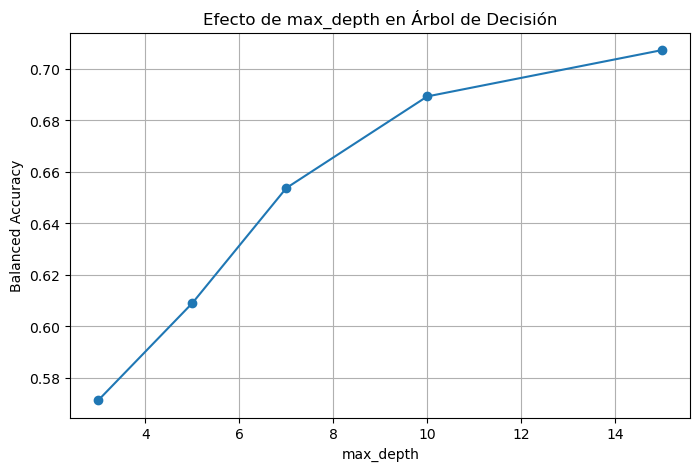

In [16]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extraemos los resultados en DataFrames para facilitar el análisis.

results_tree = pd.DataFrame(tree_grid.cv_results_)


# Agrupamos por 'param_tree__max_depth' y calculamos la media de la métrica
grouped_depth = results_tree.groupby('param_tree__max_depth')['mean_test_score'].mean().reset_index()

# Graficamos la evolución de Balanced Accuracy en función de max_depth
plt.figure(figsize=(8, 5))
plt.plot(
    grouped_depth['param_tree__max_depth'], 
    grouped_depth['mean_test_score'], 
    marker='o'
)
plt.xlabel("max_depth")
plt.ylabel("Balanced Accuracy")
plt.title("Efecto de max_depth en Árbol de Decisión")
plt.grid(True)
plt.show()


Esta gráfica muestra como influye la profundidad máxima del árbol en el rendimiento. Que para cada valor mayor de max_depth, la Balanced Accuracy aumenta. Esto nos sugiere, que para nuestros datos, un valor grande de max_depth mejora el rendimiento del modelo en cuanto a la Balanced Accuracy.

*Efecto de min_samples_split*

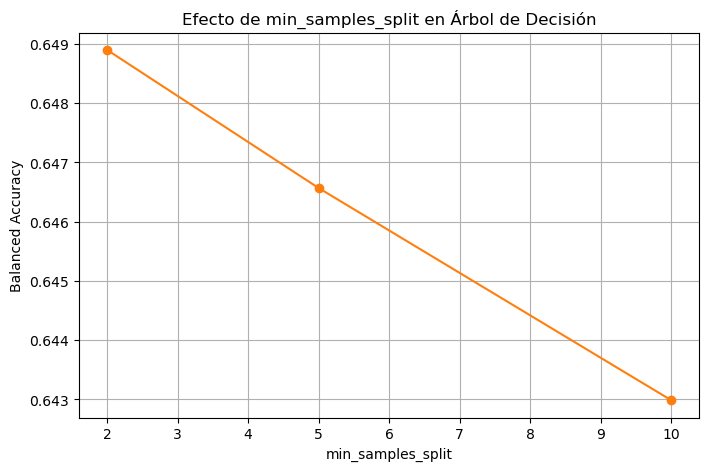

In [17]:
# Agrupamos los resultados según 'min_samples_split'
grouped_split = results_tree.groupby('param_tree__min_samples_split')['mean_test_score'].mean().reset_index()

# Graficamos el efecto de min_samples_split
plt.figure(figsize=(8, 5))
plt.plot(
    grouped_split['param_tree__min_samples_split'], 
    grouped_split['mean_test_score'], 
    marker='o', 
    color='tab:orange'
)
plt.xlabel("min_samples_split")
plt.ylabel("Balanced Accuracy")
plt.title("Efecto de min_samples_split en Árbol de Decisión")
plt.grid(True)
plt.show()


Aquí se observa como disminuye la Balanced Accuracy al aumentar el valor de min_samples_split. Esto indica que, para este conjunto de datos, un valor más bajo de min_samples_split tiende a mejorar el rendimiento del modelo en términos de Balanced Accuracy.

*Efecto de min_samples_leaf*

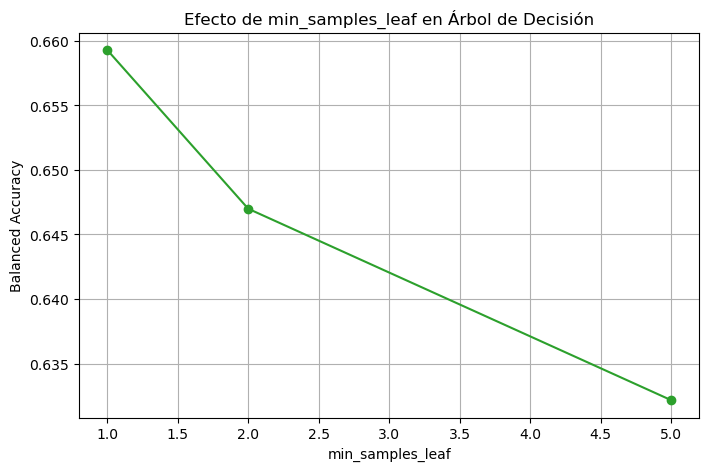

In [18]:
# Agrupamos los resultados según 'min_samples_leaf'
grouped_leaf = results_tree.groupby('param_tree__min_samples_leaf')['mean_test_score'].mean().reset_index()

# Graficamos el efecto de min_samples_leaf
plt.figure(figsize=(8, 5))
plt.plot(
    grouped_leaf['param_tree__min_samples_leaf'], 
    grouped_leaf['mean_test_score'], 
    marker='o', 
    color='tab:green'
)
plt.xlabel("min_samples_leaf")
plt.ylabel("Balanced Accuracy")
plt.title("Efecto de min_samples_leaf en Árbol de Decisión")
plt.grid(True)
plt.show()


Esta gráfica nos permite visualizar como disminuye la Balanced Accuracy a medida que el valor de min_samples_leaf aumenta, por lo que para nuestros datos, un valor más pequeño de min_samples_leaf mejora el rendimiento de nuestro modelo en cuanto a la Balanced Accuracy

## 4.3 Conclusiones de la sección

Primero debemos evaluar el cambio de Accuracy y tiempos de entrenamiento entre el modelo default y el que utiliza los hiperparámetros correspondientes. En resumen, estos han sido nuestros resultados en el apartado 4:

In [19]:
# Comparación de balanced accuracy antes y después de ajuste de hiperparámetros
print("---------EVALUACIÓN DE ACCURACY---------\n")
print(f"KNN - Balanced Accuracy (default): {mean_score_knn}")
print(f"KNN - Balanced Accuracy (optimizado): {knn_best_score}")
print(f"Árbol - Balanced Accuracy (default): {mean_score_tree}")
print(f"Árbol - Balanced Accuracy (optimizado): {tree_best_score}\n\n")

# Comparación de tiempos de entrenamiento
print("---------EVALUACIÓN DE TIEMPO---------\n")
print(f"KNN - Tiempo de entrenamiento (default): {training_time_knn_default:.4f} segundos")
print(f"KNN - Tiempo de entrenamiento (optimizado): {training_time_knn_hpo:.4f} segundos")
print(f"Árbol - Tiempo de entrenamiento (default): {training_time_tree_default:.4f} segundos")
print(f"Árbol - Tiempo de entrenamiento (optimizado): {training_time_tree_hpo:.4f} segundos")

---------EVALUACIÓN DE ACCURACY---------

KNN - Balanced Accuracy (default): 0.5757790041600811
KNN - Balanced Accuracy (optimizado): 0.7968899950376332
Árbol - Balanced Accuracy (default): 0.7620253233736225
Árbol - Balanced Accuracy (optimizado): 0.7619736775948042


---------EVALUACIÓN DE TIEMPO---------

KNN - Tiempo de entrenamiento (default): 0.0569 segundos
KNN - Tiempo de entrenamiento (optimizado): 1.9350 segundos
Árbol - Tiempo de entrenamiento (default): 0.0635 segundos
Árbol - Tiempo de entrenamiento (optimizado): 0.4689 segundos


Para comparar los resultados con nuestros modelos, hemos creado el siguiente DummyClassifier:

In [20]:
import time
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score

# Creamos el DummyClassifier utilizando la estrategia 'most_frequent'
dummy = DummyClassifier(strategy='most_frequent', random_state=42)

# Medimos el tiempo de entrenamiento
start_time = time.time()
dummy.fit(X_train, y_train)
end_time = time.time()
training_time_dummy = end_time - start_time

# Realizamos predicciones en el conjunto de entrenamiento
y_pred_dummy = dummy.predict(X_train)

# Calculamos la Balanced Accuracy del DummyClassifier
balacc_dummy = balanced_accuracy_score(y_train, y_pred_dummy)

print(f"Balanced Accuracy Dummy Model: {balacc_dummy:.4f}")
print(f"Tiempo de entrenamiento Dummy Model: {training_time_dummy:.4f} segundos")


Balanced Accuracy Dummy Model: 0.5000
Tiempo de entrenamiento Dummy Model: 0.0006 segundos


Trás evaluar el rendimiento de los modelos en esta sección, podemos conlcuir que el método KNN con hiperparámetros optimizados obtuvo los mejores resultados, con una Balanced Accuracy de 79.68%. Este resultado mejoró notablemente respecto a su versión sin optimizar, que obtuvo un 57.60% y superó claramente a un modelo trivial (50%), mostrando que ajustar los parámetros específicos aporta un beneficio real.

Sin embargo, esta mejora tiene un coste, ya que el tiempo de entrenamiento aumentó bastante, pasó de 0.0741 segundos a 4 segundos. A pesar de este incremento en el tiempo de entrenamiento, sigue siendo razonable, considerando la mejora obtenida en la Balanced Accuracy.

En cuanto a los Árboles de Decisión, sorprendentemente no hubo muchas mejoras después del ajuste de hiperparámetros, ya que la configuración básica era bastante buena, llegando de hecho a ser mejor que la optimizada, pasó de un 76.20% a 76.19% tras el ajuste. Además, los Árboles de Decisión son mucho más rápidos que KNN, incluso tras optimizarlos. Obtuvimos unos tiempos de entrenamiento de 0.1787 segundos antes del ajuste y 0.9081 segundos después.

En resumen, KNN optimizado es la mejor opción si buscamos precisión máxima y no importa tanto el tiempo de entrenamiento, mientras que los Árboles de Decisión en su configuración estándar ofrecen un buen equilibrio entre precisión y rapidez. Ambos modelos son mucho mejores que un modelo dummy.

# **5. Avanzados: Modelos lineales y SVM's**

En esta sección vamos a considerar dos tipos de métodos para evaluar: Lineales y SVM's. Para introducirlos, podemos definirlos de la siguiente forma:

 - Modelos Lineales: Buscan una relación lineal entre las variables de entrada y de salida, incluyendo la regresión lineal (continuos) o regresión logística (clasificación).

 - SVMs: Encuentran un plano óptimo para separar clases en un conjunto de datos, tratando de aumentar el margen entre el plano y los vectores de soporte (puntos límite de cada clase).

Se seguirán dos pasos para cada modelo:
    1. Evaluación inicial con los hiperparámetros por defecto.
    2. Evaluación trás un ajuste de hiperparámetros mediante GridSearchCV.

Además, se medirá el tiempo de entrenamiento y se utilizará Balanced Accuracy como métrica principal, por ser más adecuada en problemas de clases desbalanceadas.

## 5.1 Evaluación por omisión

En primer lugar, evaluamos los modelos en su versión estándar, sin ajuste, y se mediran los tiempos de entrenamiento, utilizando para ello Pipelines.

### 5.1.1 Lineales con parámetros por omisión

Evaluamos tanto regresión logística como lineal con y sin regularización L1.
 - Esta regularización L1 (Lasso) consiste en añadir una penalización al modelo para así evitar un sobreajuste y mejorar su generalización, haciendo el modelo más interpretable.

In [21]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Modelo: Regresión Logística con L1
logreg_l1_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
    ('logreg', LogisticRegression(penalty='l1', solver='liblinear'))  # L1 requiere solver='liblinear'
])

# Modelo: Regresión Logística sin regularización (penalty='none')
logreg_no_reg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
    ('logreg', LogisticRegression(penalty=None))  # Sin regularización
])

# Modelo: SVM lineal con L1
svc_l1_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
    ('svc', LinearSVC(penalty='l1', dual=False, max_iter=10000))  # dual=False necesario para L1
])

# Modelo: SVM lineal sin regularización (equivalente a un muy alto C)
svc_no_reg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
    ('svc', LinearSVC(penalty='l2', C=1e10, dual=False, max_iter=10000))  # Aproximadamente sin regularización
])

# Función para entrenar y evaluar modelos
def evaluar_modelo(pipeline, X_train, y_train, nombre):
    start_time = time.time()
    scores_lineal = cross_val_score(pipeline, X_train, y_train, cv=inner, scoring='balanced_accuracy')
    mean_score_lineal = np.mean(scores_lineal)  # Media de balanced accuracy
    end_time = time.time()
    
    training_time = end_time - start_time

    print(f"Modelo: {nombre}")
    print(f"Tiempo de entrenamiento: {training_time} segundos")
    print(f"Balanced Accuracy: {mean_score_lineal}\n")

# Evaluar todos los modelos
evaluar_modelo(logreg_l1_pipeline, X_train, y_train, "Logistic Regression (L1)")
evaluar_modelo(logreg_no_reg_pipeline, X_train, y_train, "Logistic Regression (Sin regularización)")
evaluar_modelo(svc_l1_pipeline, X_train, y_train, "SVM Lineal (L1)")
evaluar_modelo(svc_no_reg_pipeline, X_train, y_train, "SVM Lineal (Sin regularización)")


Modelo: Logistic Regression (L1)
Tiempo de entrenamiento: 0.07228493690490723 segundos
Balanced Accuracy: 0.5864383103468629

Modelo: Logistic Regression (Sin regularización)
Tiempo de entrenamiento: 0.05388832092285156 segundos
Balanced Accuracy: 0.5935657010818834

Modelo: SVM Lineal (L1)
Tiempo de entrenamiento: 0.27388739585876465 segundos
Balanced Accuracy: 0.5685039447537726

Modelo: SVM Lineal (Sin regularización)
Tiempo de entrenamiento: 0.04238486289978027 segundos
Balanced Accuracy: 0.5754980948446037



### 5.1.2 SVMs con parámetros por omisión

Evaluamos las máquinas de vectores de soporte (SVMs) con sus parámetros estandar, que son: 

 - kernel='rbf' (Función no lineal)
 - C=1.0 (Regularización)

In [22]:
import time
from sklearn.svm import SVC  # Importamos el clasificador SVM
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Definir el pipeline con SVM
default_svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Manejo de valores perdidos
    ('scaler', RobustScaler()),  # Normalización de datos
    ('svm', SVC())  # SVM con parámetros por omisión (kernel='rbf', C=1.0)
])


# Medir tiempo de entrenamiento
start_time = time.time()
scores_svm = cross_val_score(default_svm_pipeline, X_train, y_train, cv=inner, scoring='balanced_accuracy')
mean_score_svm = np.mean(scores_svm)  # Media de balanced accuracy
end_time = time.time()

training_time_svm_default = end_time - start_time
print(f"Tiempo de entrenamiento SVM (default): {training_time_svm_default:.4f} segundos")


print(f"Balanced Accuracy SVM (default): {mean_score_svm:.4f}")


Tiempo de entrenamiento SVM (default): 0.2094 segundos
Balanced Accuracy SVM (default): 0.6201


## 5.2 Evaluación con ajuste de hiperparámetros (HPO)

En esta parte se realiza un GridSearchCV para encontrar la mejor configuración de parámetros para cada modelo. Se mantiene la validación cruzada estratificada, (3 folds) y se mide también el tiempo necesario

#### 5.2.1 Regresión Logística

Los hiperparámetros principales de la regresión logística son:

* C: Inverso de la regularización. Cuanto menor es, mayor es la regularización.
* penalty: Tipo de regularización (L1 o L2).

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'saga']  # Compatible con L1 y L2
}

lr_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])


logreg_grid = GridSearchCV(lr_pipeline, param_grid_lr, scoring='balanced_accuracy', cv=inner, n_jobs=-1)

start_time = time.time()
logreg_grid.fit(X_train, y_train)
end_time = time.time()

training_time_logreg_hpo = end_time - start_time
best_logreg_model = logreg_grid.best_estimator_
best_logreg_params = logreg_grid.best_params_
best_logreg_hpo = logreg_grid.best_score_

best_score = logreg_grid.best_score_
print(f"Mejores hiperparámetros para Regresión Logística: {best_logreg_params}")
print(f"Tiempo de entrenamiento Regresión Logística (HPO): {training_time_logreg_hpo:.4f} segundos")
print(f"Balanced Accuracy Regresión Logística (HPO): {best_logreg_hpo:.4f}")

Mejores hiperparámetros para Regresión Logística: {'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Tiempo de entrenamiento Regresión Logística (HPO): 0.6159 segundos
Balanced Accuracy Regresión Logística (HPO): 0.5936


#### 5.2.2 SVM Lineal y Kernel (RBF)

Los hiperparámetros más importantes son:

* C: Parámetro de regularización.
* kernel: linear, rbf, poly.
* gamma: scale, auto

In [24]:
param_grid_svm = {
    'svm__C': [0.01, 0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto'], 
}

svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
    ('svm', SVC())
])


svm_grid = GridSearchCV(svm_pipeline, param_grid_svm, scoring='balanced_accuracy', cv=inner, n_jobs=-1)

start_time = time.time()
svm_grid.fit(X_train, y_train)
end_time = time.time()

training_time_svm_hpo = end_time - start_time
best_svm_model = svm_grid.best_estimator_
best_svm_params = svm_grid.best_params_
best_score = svm_grid.best_score_

print(f"Mejores hiperparámetros para SVM: {best_svm_params}")
print(f"Tiempo de entrenamiento SVM (HPO): {training_time_svm_hpo:.4f} segundos")
print(f"Balanced Accuracy SVM (HPO): {best_score:.4f}")

Mejores hiperparámetros para SVM: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Tiempo de entrenamiento SVM (HPO): 0.9580 segundos
Balanced Accuracy SVM (HPO): 0.8278


#### 5.2.3 Conclusiones
Regresión Logística logró su mejor rendimiento con penalty='l1' y C=100 obteniendo una Balanced Accuracy de 0.5936, con un tiempo de entrenamiento bastante bajo.
SVM con Kernel RBF tras el ajuste obtuvo un rendimiento notable, con una Balanced Accuracy de 0.8278, solo que con un mayor tiempo de entrenamiento.

Si se busca precisión, SVM con Kernel RBF es la mejor opción, sin embargo, si se busca rapidez la regresión logística es la opción mas adecuada.

### 5.3 Atributos más relevantes 
Una de las ventajas claves de utilizar modelos lineares con regularización L1 es que permiten identificar los atributos más relevantes del modelo de forma directa, Esto se consigue analizando los coeficientes aprendidos durante el entrenamiento.

En particular:
* En la regresión logística, cada variable tiene un coeficiente asociado.
* Si usamos regularización L1, muchos coeficientes no relevantes se reducen a 0.
* Los coeficientes más grandes (en valor absoluto) indican atributos más influyentes en la predicción.

En esta sección vamos a extraer los coeficientes del modelo best_logreg_model (Regresión Logística con L1 del apartado anterior) y los asociamos a los nombres de las variables. Luego hacemos una gráfica con los 10 más importantes.

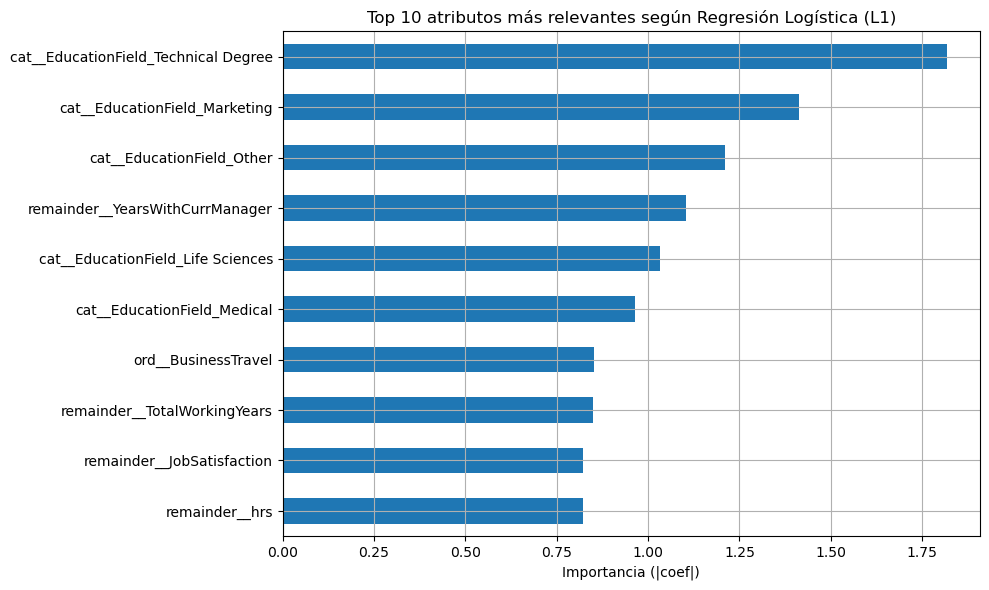

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extraer coeficientes
coefs = best_logreg_model.named_steps['logreg'].coef_[0]

# Extraer los nombres de las columnas (ya preprocesadas)
columnas = X_train.columns

# Asociamos cada coeficiente con su nombre de variable
importancias = pd.Series(np.abs(coefs), index=columnas)

# Ordenamos por valor absoluto descendente (más relevante primero)
importancias_ordenadas = importancias.sort_values(ascending=False)

# Mostramos las 10 variables más influyentes
top_10 = importancias_ordenadas.head(10)

# Gráfica de barras horizontales
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh')
plt.xlabel("Importancia (|coef|)")
plt.title("Top 10 atributos más relevantes según Regresión Logística (L1)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()



En la gráfica obtenida, cada barra representa la importancia relativa de una variable en el modelo. Observamos que el atributo más importante es YearsWithCurrentManager, seguido de TotalWorkingYears y Hours. Estos resultados son importantes para la interpretabilidad del modelo, permitiendo entender que características influyen más en la probabilidad de abandono de un empleado.